# Early stopping

In [1]:
from sklearn.datasets import make_moons
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


###### Tensorflow-GPU ########
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:  # Check if the list is not empty
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU devices found.")

import re



/Users/pascal-maker/pascalworkspace/env/lib/python3.10/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


No GPU devices found.


In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Dataset creation

In [3]:
# Dataset generation
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)

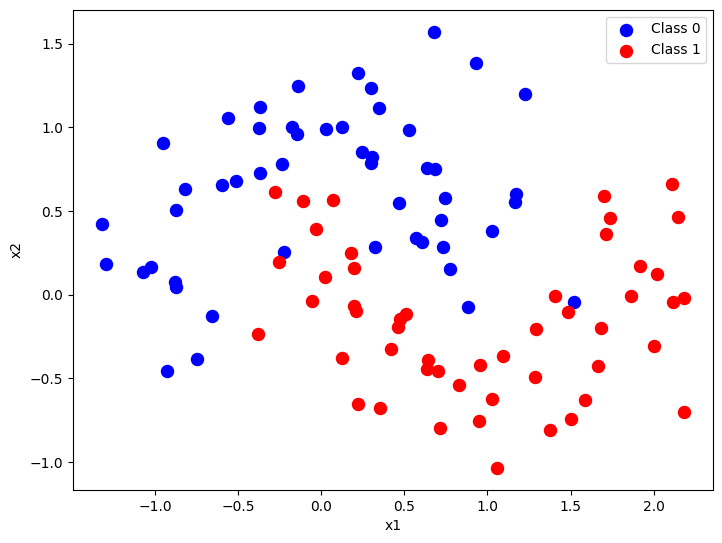

In [4]:
x1 = X[:,0]
x2 = X[:,1]

zero_class = (y ==0)
one_class =  (y==1)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Class 0')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Class 1')
ax_admission.set_xlabel('x1')
ax_admission.set_ylabel('x2')
ax_admission.legend(loc=1,numpoints=1)

In [5]:
# Training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

## Neural network training and testing

In [6]:
# Neural network

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/mcldwitt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758795113.642450    1075 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758795113.642650    1075 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758795113.642716    1075 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758795115.132698    1075 cuda_executor.cc:1001] cou

In [7]:
# Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000


I0000 00:00:1758795116.784623    1184 service.cc:146] XLA service 0x7f2870001b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758795116.784653    1184 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-09-25 12:11:56.813188: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-25 12:11:56.970572: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-09-25 12:11:57.997880: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_436', 20 bytes spill stores, 20 bytes spill loads

2025-09-25 12:11:58.112025: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 0.6944

I0000 00:00:1758795118.761623    1184 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4531 - loss: 0.6904 - val_accuracy: 0.7000 - val_loss: 0.6442
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7464 - loss: 0.6091 - val_accuracy: 0.7333 - val_loss: 0.5887
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7920 - loss: 0.5371 - val_accuracy: 0.8000 - val_loss: 0.5321
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7945 - loss: 0.4908 - val_accuracy: 0.8000 - val_loss: 0.4706
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8062 - loss: 0.4271 - val_accuracy: 0.8333 - val_loss: 0.4130
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8166 - loss: 0.3976 - val_accuracy: 0.8667 - val_loss: 0.3676
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8622 - loss: 0.3518 - val_accuracy: 0.8667 - val_loss: 0.3400
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8504 - loss: 0.3524 - val_accuracy: 0.8667 - val_loss: 0.3218

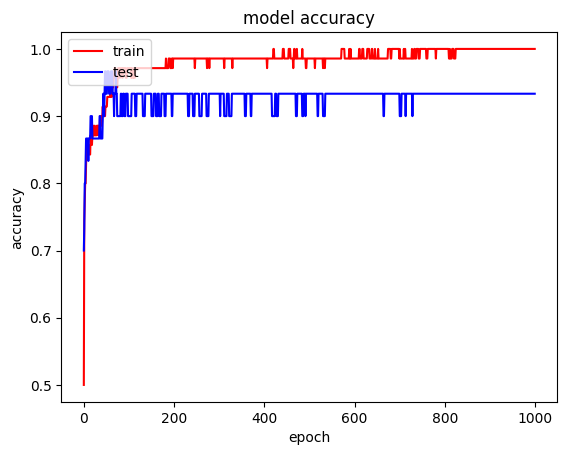

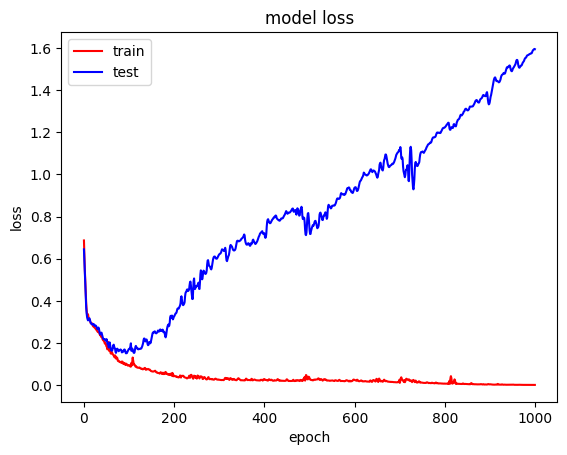

In [8]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping

In [ ]:
# Import EarlyStopping for stopping training when validation loss stops improving
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
# Monitors the validation loss ('val_loss') and stops training when it stops decreasing
# 'mode' is set to 'min' because we want to minimize the validation loss
# 'verbose=1' enables logging when early stopping is triggered
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Define a Sequential neural network model
model = Sequential()

# Input layer with 2 input features and 200 neurons, using ReLU activation
model.add(Dense(200, input_dim=2, activation='relu'))

# Hidden layer with 200 neurons and ReLU activation
model.add(Dense(200, activation='relu'))

# Another hidden layer with 200 neurons and ReLU activation
model.add(Dense(200, activation='relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# Loss function: Binary cross-entropy for binary classification
# Optimizer: Adam optimizer for adaptive learning rate
# Metrics: Accuracy to evaluate model performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# Training data: X_train and y_train
# Validation data: X_test and y_test
# Epochs: Maximum of 1000 epochs
# Verbose: 1 (displays training progress)
# Callbacks: Early stopping to stop training when validation loss stops improving
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.5175 - loss: 0.6954 - val_accuracy: 0.8667 - val_loss: 0.6234
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8472 - loss: 0.6060 - val_accuracy: 0.8333 - val_loss: 0.5607
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8212 - loss: 0.5295 - val_accuracy: 0.8333 - val_loss: 0.4933
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8056 - loss: 0.4633 - val_accuracy: 0.8667 - val_loss: 0.4263
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8205 - loss: 0.4008 - val_accuracy: 0.8667 - val_loss: 0.3737
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8426 - loss: 0.3781 - val_accuracy: 0.8333 - val_loss: 0.3425
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8654 - loss: 0.3362 - val_accuracy: 0.8333 - val_loss: 0.3282
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8771 - loss: 0.3178 - val_accuracy: 0.8333 - 

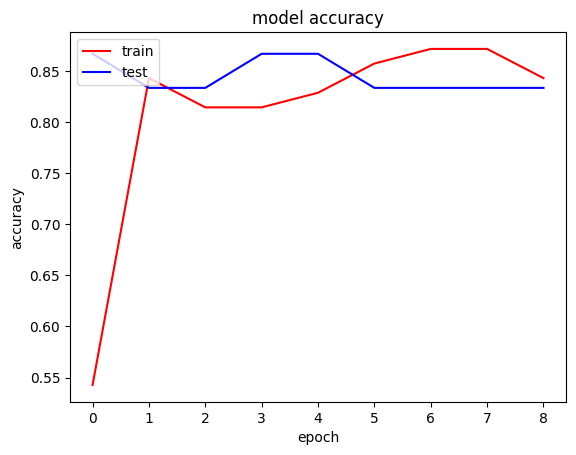

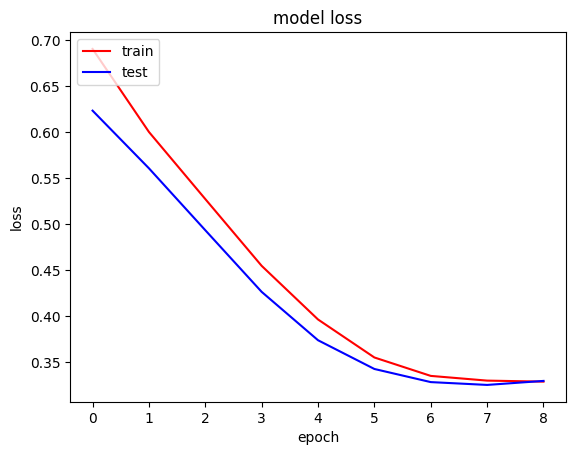

In [10]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping with patience

In [10]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)

# Neural netwok with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=1,callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.6752 - accuracy: 0.7991 - val_loss: 0.6187 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5920 - accuracy: 0.8219 - val_loss: 0.5642 - val_accuracy: 0.8000
Epoch 3/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5344 - accuracy: 0.7874 - val_loss: 0.5198 - val_accuracy: 0.8000
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4679 - accuracy: 0.8147 - val_loss: 0.4651 - val_accuracy: 0.8333
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4177 - accuracy: 0.8069 - val_loss: 0.4090 - val_accuracy: 0.8000
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3884 - accuracy: 0.7906 - val_loss: 0.3645 - val_accuracy: 0.8333
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3532 - accuracy: 0.8095 - val_loss: 0.3338 - val_accuracy: 0.8667
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1494 - accuracy: 0.9259 - val_loss: 0.1903 - val_accuracy: 0.9333
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.1361 - accuracy: 0.9708 - val_loss: 0.2001 - val_accuracy: 0.9333
Epoch 61/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1943 - accuracy: 0.9590 - val_loss: 0.1912 - val_accuracy: 0.9333
Epoch 62/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1899 - accuracy: 0.9434 - val_loss: 0.1829 - val_accuracy: 0.9333
Epoch 63/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.1579 - accuracy: 0.9512 - val_loss: 0.1846 - val_accuracy: 0.9333
Epoch 64/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1470 - accuracy: 0.9480 - val_loss: 0.1752 - val_accuracy: 0.9333
Epoch 65/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.1306 - accuracy: 0.9519 - val_loss: 0.1697 - val_accuracy: 0.9333
Epoch 

3/3 [==============================] - 0s 24ms/step - loss: 0.0688 - accuracy: 0.9740 - val_loss: 0.1399 - val_accuracy: 0.9333
Epoch 117/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0636 - accuracy: 0.9818 - val_loss: 0.1552 - val_accuracy: 0.9333
Epoch 118/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1077 - accuracy: 0.9623 - val_loss: 0.1476 - val_accuracy: 0.9333
Epoch 00118: early stopping


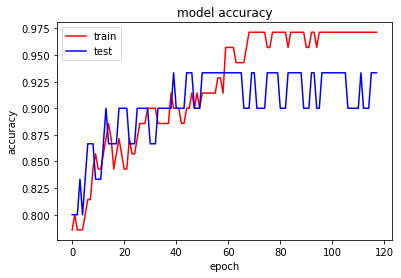

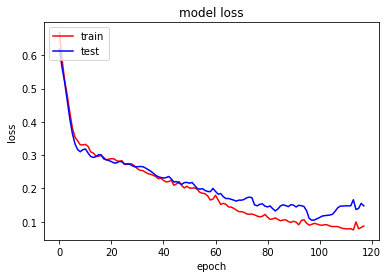

In [11]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping with patience and Modelcheckpoint saving

In [ ]:
# Import necessary callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the file path to save the best model's weights
checkpoint_filepath = './bestmodel'

# ModelCheckpoint callback
# Saves the model's weights only when the validation accuracy ('val_accuracy') improves
# 'save_best_only=True' ensures only the best model (highest validation accuracy) is saved
# 'mode=max' because we want to maximize validation accuracy
# 'verbose=1' enables logging when the model is saved
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,  # File path to save the best model
    save_weights_only=True,        # Save only the weights, not the full model
    monitor='val_accuracy',        # Monitor validation accuracy
    mode='max',                    # Save when validation accuracy is maximized
    save_best_only=True            # Save only the best model
)

# EarlyStopping callback
# Stops training when validation loss ('val_loss') stops improving
# 'mode=min' because we want to minimize validation loss
# 'patience=20' allows training to continue for 20 epochs after the last improvement
# 'verbose=1' enables logging when early stopping is triggered
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Define a Sequential neural network model
model = Sequential()

# Input layer with 2 input features and 200 neurons, using ReLU activation
model.add(Dense(200, input_dim=2, activation='relu'))

# Hidden layer with 200 neurons and ReLU activation
model.add(Dense(200, activation='relu'))

# Another hidden layer with 200 neurons and ReLU activation
model.add(Dense(200, activation='relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# Loss function: Binary cross-entropy for binary classification
# Optimizer: Adam optimizer for adaptive learning rate
# Metrics: Accuracy to evaluate model performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# Training data: X_train and y_train
# Validation data: X_test and y_test
# Epochs: Maximum of 200 epochs
# Verbose: 1 (displays training progress)
# Callbacks: 
#   - Early stopping to stop training when validation loss stops improving
#   - Model checkpoint to save the best model based on validation accuracy
story = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=200, 
    verbose=1, 
    callbacks=[es, mc]
)

Epoch 1/200
3/3 [==============================] - 0s 42ms/step - loss: 0.6814 - accuracy: 0.6033 - val_loss: 0.6123 - val_accuracy: 0.8333
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6007 - accuracy: 0.8615 - val_loss: 0.5551 - val_accuracy: 0.8667
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.5345 - accuracy: 0.8283 - val_loss: 0.4947 - val_accuracy: 0.8667
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4588 - accuracy: 0.8368 - val_loss: 0.4362 - val_accuracy: 0.8667
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4139 - accuracy: 0.8056 - val_loss: 0.3894 - val_accuracy: 0.8667
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 0.3776 - accuracy: 0.8244 - val_loss: 0.3524 - val_accuracy: 0.8667
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.3292 - accuracy: 0.8511 - val_loss: 0.3335 - val_accuracy: 0.8667
Epoch 8/200
3/3 [===

3/3 [==============================] - 0s 20ms/step - loss: 0.1180 - accuracy: 0.9669 - val_loss: 0.1864 - val_accuracy: 0.9000
Epoch 60/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1388 - accuracy: 0.9779 - val_loss: 0.1923 - val_accuracy: 0.9000
Epoch 61/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1568 - accuracy: 0.9701 - val_loss: 0.1839 - val_accuracy: 0.9000
Epoch 62/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1421 - accuracy: 0.9701 - val_loss: 0.1680 - val_accuracy: 0.9000
Epoch 63/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1126 - accuracy: 0.9629 - val_loss: 0.1620 - val_accuracy: 0.9333
Epoch 64/200
3/3 [==============================] - 0s 20ms/step - loss: 0.1643 - accuracy: 0.9434 - val_loss: 0.1613 - val_accuracy: 0.9333
Epoch 65/200
3/3 [==============================] - 0s 26ms/step - loss: 0.1372 - accuracy: 0.9480 - val_loss: 0.1582 - val_accuracy: 0.9333
Epoch 66/200
3/3 [========

In [13]:
# Loading the best performing model
model.load_weights(checkpoint_filepath)

# Testing the best performing model
y_pred = (model.predict(X_test) > 0.5).astype('int32')

print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 






              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[15  1]
 [ 1 13]]
93.33333333333333
